In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
cost_mu, cost_sigma = 5000,300
b_mu, b_sigma = 3000, 200
c_mu, c_sigma = 4000, 300

def cost(t):
    return np.random.normal(cost_mu, cost_sigma)

def B(t):
    return np.random.normal(b_mu, b_sigma)

def C(t):
    return np.random.normal(c_mu, c_sigma)

In [40]:
T = 100
K = 3

regrets_origin=[0]
regrets_exp3=[0]
regrets_random=[0]

weight=[[1] * K for x in range(0,T+2)]
prob=[[1] * K for x in range(0,T+2)] # 0: use origin, 1: use card

gamma = 0.3

z=[]

for i in range(1,T+1):
    cost_t = cost(i)
    card_B, card_C = B(i), C(i)
    daily_optimal = np.min([cost_t, card_B, card_C])
    daily_div = np.max([cost_t, card_B, card_C]) - np.min([cost_t, card_B, card_C])

    # Origin cost without any cards
    dailycost_origin = cost_t
    regrets_origin.append(np.max([0,dailycost_origin - daily_optimal]) / daily_div)
    z.append({"t": i, "cost": dailycost_origin, "win": (dailycost_origin == daily_optimal),
              "regret": np.sum(regrets_origin),
              "method": "origin"})
    
    """
    # random choice
    random_arr = [1/3,1/3,1/3]
    dailycost_random=np.random.choice([cost_t, card_B, card_C], 1, p=np.array())
    regrets_random.append(np.max([0,dailycost_random - daily_optimal]) / daily_div)
    z.append({"t": i, "cost": dailycost_random, "win": (dailycost_random == daily_optimal),
              "regret": np.sum(regrets_random),
              "method": "random"})
    """
    
    # exp3
    for arm in range(K):
        prob[i][arm] = (1 - gamma)*(weight[i][arm])/np.sum(weight[i]) + gamma/K

    draw = np.random.choice([0,1,2], 1, p=np.array(prob[i])/np.sum(prob[i]))


    if draw == 0: # not buy
        dailycost_exp3 = dailycost_origin
    elif draw == 1:
        dailycost_exp3 = card_B
    else:
        dailycost_exp3 = card_C

    x_hat = [0] * K
    for arm in range(K):
        if arm == draw:
            x_hat[arm] = np.max([0,dailycost_exp3 - daily_optimal]) / daily_div / prob[i][arm]
        else:
            x_hat[arm] = 0
    weight[i+1][arm] = weight[i][arm]*np.exp(gamma*x_hat[arm]/K)
    
    regrets_exp3.append(np.max([0,dailycost_exp3 - daily_optimal]) / daily_div)
    
    z.append({"t": i, "cost": dailycost_exp3, "win": (dailycost_exp3 == daily_optimal),
              "regret": np.sum(regrets_exp3),
              "method": "exp3"})
    
    #z.append({"t": i, "regret": i, "method": "y=x"})
    #z.append({"t": i, "regret": 8 * np.sqrt(i), "method": "root"})

df=pd.DataFrame(z)

<AxesSubplot:xlabel='t', ylabel='regret'>

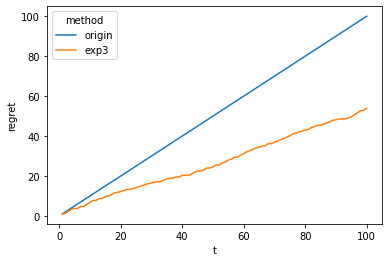

In [41]:
sns.lineplot(x="t",y="regret",data=df,hue="method")

array([0.33333333, 0.33333333, 0.33333333])